# PIA - Optimización de equipos de la NBA con el Método Win Shares

#### Parte 1 - Limpieza y obtencion de Datos

**Resumen:** Se hizo un webscrapping de la Página de ESPN para sacar los salarios de los jugadores de la NBA para la temporada 24-25. Adicional a esto se hizo un merge con una base de datos proporcionada por StatHead sobre las estadisticas de estos mismos.

Los datos se modificaron para quitar caracteres raros y mejorar los resultados encontrados en el merge, además modifique las variables y genere nuevas para terminar con un dataset para el proyecto Final

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Salary_list = []
for i in range(1,14):
    
    url = f"https://www.espn.com/nba/salaries/_/year/2025/page/{i}"
    headers = {"User-Agent": "Mozilla/5.0"}
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")

    # Encuentra la tabla
    table = soup.find("table")
    rows = table.find_all("tr")[1:]  # omite encabezado

    for row in rows:
        cols = [col.text.strip() for col in row.find_all("td")]
        Salary_list.append(cols)

Salary = pd.DataFrame(Salary_list, columns=["Rank","Player", "Team", "Salary"])
Salary.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Salarys.csv')
Salary.head()

,Rank,Player,Team,Salary
0,1,"Stephen Curry, G",Golden State Warriors,"$55,761,216"
1,2,"Joel Embiid, C",Philadelphia 76ers,"$51,415,938"
2,3,"Nikola Jokic, C",Denver Nuggets,"$51,415,938"
3,4,"Kevin Durant, F",Phoenix Suns,"$51,179,021"
4,5,"Bradley Beal, G",Phoenix Suns,"$50,203,930"


In [79]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Salary = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Salarys.csv')
Salary = Salary.drop('Unnamed: 0', axis=1)

In [80]:
import re
def Clean_Name_Salary(nombre):
    nombre = re.sub(r'\b(Sr\.)\b', '', nombre)
    return nombre.strip()

def Clean_Name_Og(nombre):
    nombre = re.sub(r'(?<!Jr)\.', '', nombre)
    return nombre.strip()

In [ ]:
Salary[["Player", "Pos"]] = Salary["Player"].str.split(",", expand=True)
Salary["Player"] = Salary["Player"].str.strip()
Salary["Pos"] = Salary["Pos"].str.strip()
Salary["Player"] = Salary["Player"].apply(Clean_Name_Salary)
Salary.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Salarys.csv')
Salary.head()

,Unnamed: 0.1,Rank,Player,Team,Salary,Pos
0,0,1,Stephen Curry,Golden State Warriors,"$55,761,216",G
1,1,2,Joel Embiid,Philadelphia 76ers,"$51,415,938",C
2,2,3,Nikola Jokic,Denver Nuggets,"$51,415,938",C
3,3,4,Kevin Durant,Phoenix Suns,"$51,179,021",F
4,4,5,Bradley Beal,Phoenix Suns,"$50,203,930",G


In [82]:
from unidecode import unidecode
NBA_DB = pd.read_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/NBA Original Dataset.csv')
NBA_DB["Player"] = NBA_DB["Player"].apply(unidecode)
NBA_DB["Player"] = NBA_DB["Player"].apply(Clean_Name_Og)
NBA_DB.head()

,Rk,Player,WS,USG%,BPM,VORP,PER,Season,Age,Team,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos
0,1,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,2024-25,26,OKC,...,3.4,3.0,45.9,0.519,0.571,0.375,0.898,0.637,0.569,G
1,2,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,2024-25,29,DEN,...,4.3,3.0,38.7,0.576,0.627,0.417,0.800,0.663,0.627,C-F
2,3,Ivica Zubac,11.7,19.5,3.1,3.4,22.3,2024-25,27,LAC,...,2.3,3.1,24.5,0.628,0.628,NaN,0.661,0.641,0.628,C
3,4,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,2024-25,26,CLE,...,2.0,2.7,23.1,0.706,0.712,0.000,0.718,0.724,0.706,C-F
4,5,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,2024-25,30,MIL,...,4.3,3.3,42.7,0.601,0.620,0.222,0.617,0.625,0.607,F-G


In [83]:
Final_DB = pd.merge(NBA_DB,Salary[['Player','Salary']],on='Player',how='left')
Final_DB = Final_DB.dropna()
Final_DB.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB.csv')
Final_DB.head()

,Rk,Player,WS,USG%,BPM,VORP,PER,Season,Age,Team,...,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Pos,Salary
0,1,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,2024-25,26,OKC,...,3.0,45.9,0.519,0.571,0.375,0.898,0.637,0.569,G,"$35,859,950"
1,2,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,2024-25,29,DEN,...,3.0,38.7,0.576,0.627,0.417,0.800,0.663,0.627,C-F,"$51,415,938"
3,4,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,2024-25,26,CLE,...,2.7,23.1,0.706,0.712,0.000,0.718,0.724,0.706,C-F,"$20,000,000"
4,5,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,2024-25,30,MIL,...,3.3,42.7,0.601,0.620,0.222,0.617,0.625,0.607,F-G,"$48,787,676"
5,6,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,2024-25,24,IND,...,1.8,26.6,0.473,0.581,0.388,0.851,0.616,0.582,G,"$42,176,000"


In [84]:
M_Final_DB = Final_DB[["Player","WS","USG%","BPM","VORP","PER","Age","G","2PA","2P%","3PA","3P%","FTA","FT%","ORB","DRB","AST","STL","BLK","TOV","PF","PTS","Pos","Salary"]]
M_Final_DB['Reliability'] = M_Final_DB["G"]/82
M_Final_DB["Salary"] = M_Final_DB["Salary"].replace('[\$,]', '', regex=True).astype(float)
M_Final_DB.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
M_Final_DB.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_41188\275604227.py:3: SyntaxWarning: invalid escape sequence '\$'
  M_Final_DB["Salary"] = M_Final_DB["Salary"].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_41188\275604227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M_Final_DB['Reliability'] = M_Final_DB["G"]/82
C:\Users\Mauricio\AppData\Local\Temp\ipykernel_41188\275604227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Player,WS,USG%,BPM,VORP,PER,Age,G,2PA,2P%,...,DRB,AST,STL,BLK,TOV,PF,PTS,Pos,Salary,Reliability
0,Shai Gilgeous-Alexander,16.7,34.8,11.5,8.9,30.7,26,76,22.6,0.571,...,5.8,9.0,2.4,1.4,3.4,3.0,45.9,G,35859950.0,0.926829
1,Nikola Jokic,16.4,29.5,13.3,9.8,32.0,29,70,19.3,0.627,...,12.9,13.4,2.4,0.8,4.3,3.0,38.7,C-F,51415938.0,0.853659
3,Jarrett Allen,11.6,15.9,4.2,3.6,22.1,26,82,13.3,0.712,...,12.2,3.3,1.6,1.5,2.0,2.7,23.1,C-F,20000000.0,1.000000
4,Giannis Antetokounmpo,11.5,35.2,9.5,6.6,30.5,30,67,26.3,0.620,...,13.7,9.1,1.2,1.6,4.3,3.3,42.7,F-G,48787676.0,0.817073
5,Tyrese Haliburton,10.4,21.6,5.8,4.9,21.8,24,73,8.7,0.581,...,4.2,13.2,2.1,1.0,2.4,1.8,26.6,G,42176000.0,0.890244


### Parte 2: Analisis Descriptivo de los Datos

La idea de este apartado es ver en teminos generales, medias, varianzas, graficar los histogramas y verificar la normalidad de los datos.

In [85]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

M_Final_DB_Num = M_Final_DB.drop(['Player','G','Pos'], axis=1)

# Prueba de normalidad de Shapiro-Wilk
for var in M_Final_DB_Num:
    stat, p = shapiro(M_Final_DB_Num[var].dropna())
    print(f"{var}: p = {p:.4f} → {'Paramétrica' if p > 0.05 else 'No paramétrica'}")

WS: p = 0.0000 → No paramétrica
USG%: p = 0.0000 → No paramétrica
BPM: p = 0.0000 → No paramétrica
VORP: p = 0.0000 → No paramétrica
PER: p = 0.0000 → No paramétrica
Age: p = 0.0000 → No paramétrica
2PA: p = 0.0000 → No paramétrica
2P%: p = 0.0000 → No paramétrica
3PA: p = 0.0005 → No paramétrica
3P%: p = 0.0000 → No paramétrica
FTA: p = 0.0000 → No paramétrica
FT%: p = 0.0000 → No paramétrica
ORB: p = 0.0000 → No paramétrica
DRB: p = 0.0000 → No paramétrica
AST: p = 0.0000 → No paramétrica
STL: p = 0.0000 → No paramétrica
BLK: p = 0.0000 → No paramétrica
TOV: p = 0.0000 → No paramétrica
PF: p = 0.0000 → No paramétrica
PTS: p = 0.0000 → No paramétrica
Salary: p = 0.0000 → No paramétrica
Reliability: p = 0.0000 → No paramétrica


Podemos ver que nuestros resultados son no parametrico es decir podemos asumir que no son normales. Esto es muy comun en datos deportivos

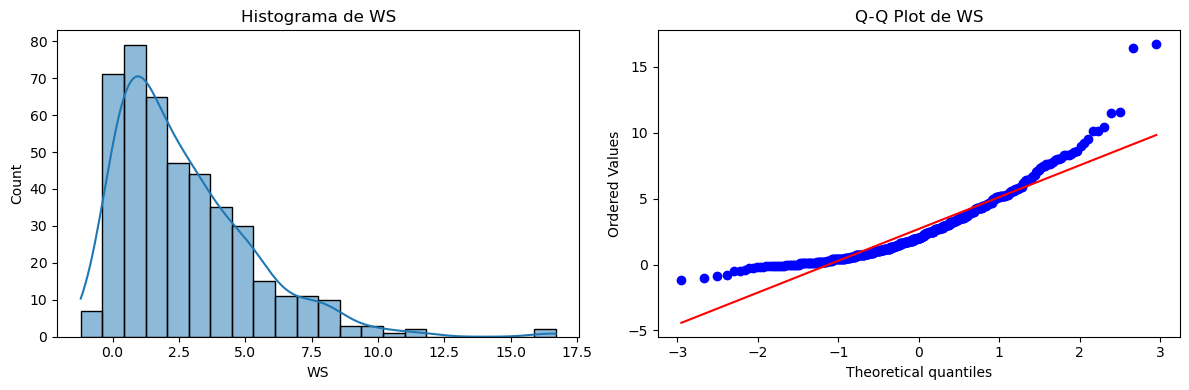

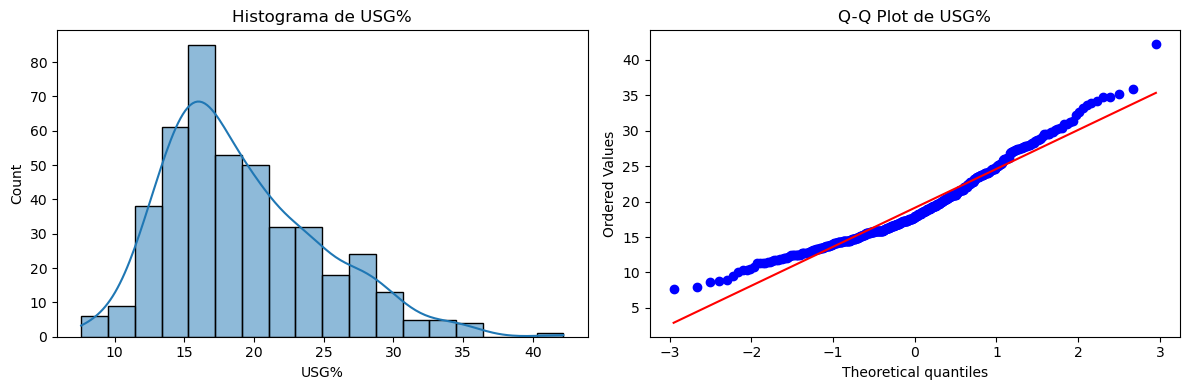

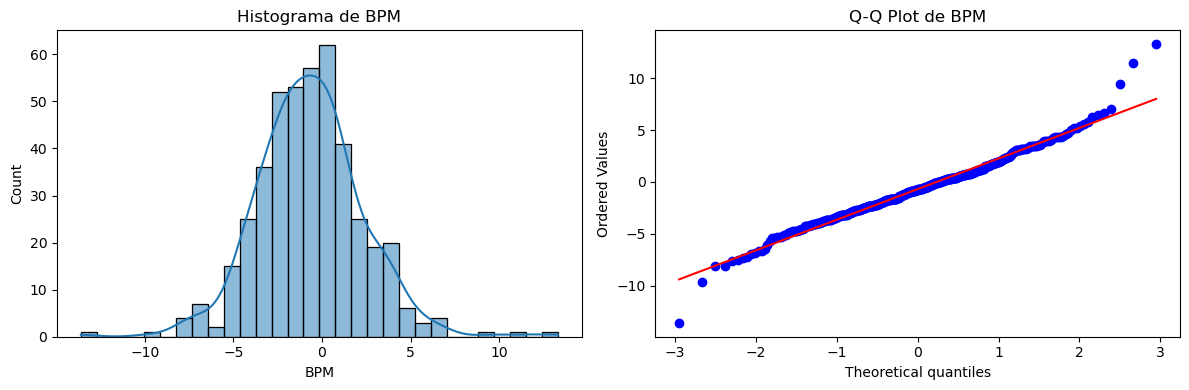

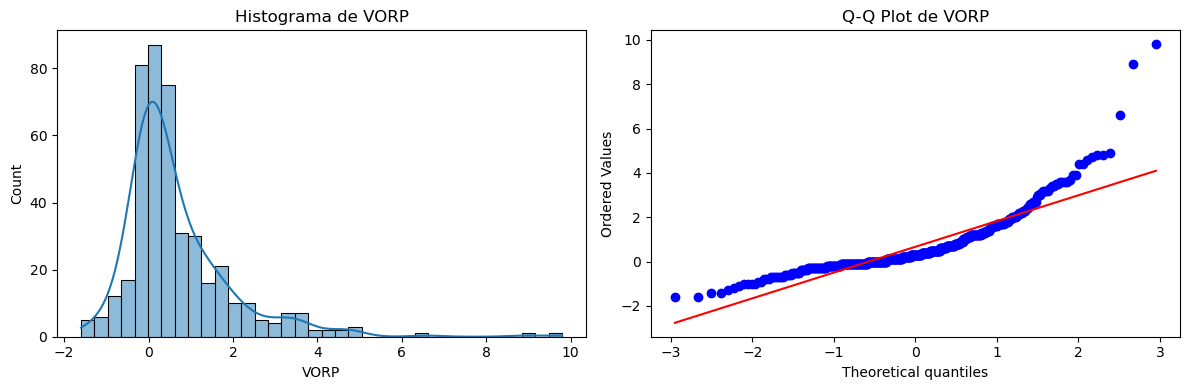

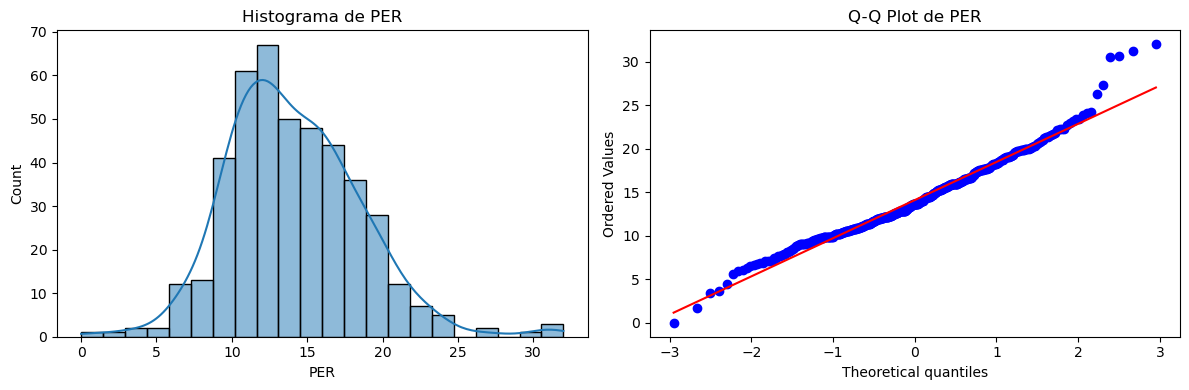

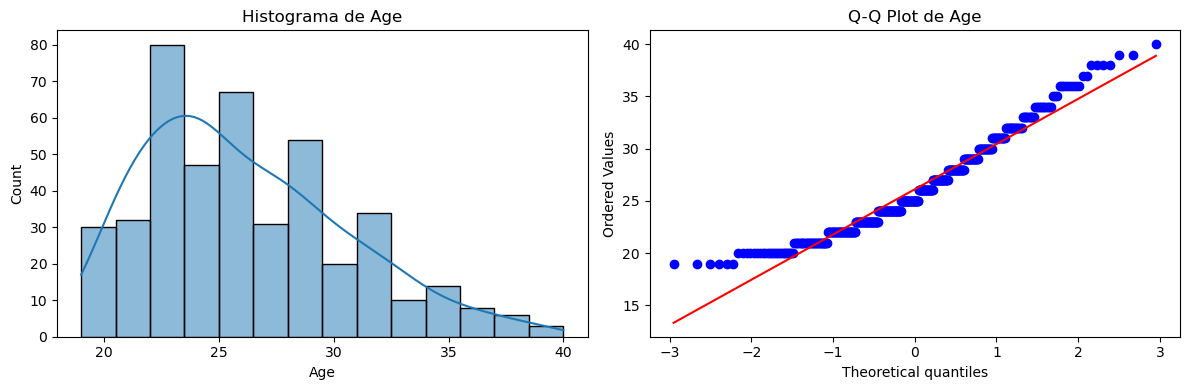

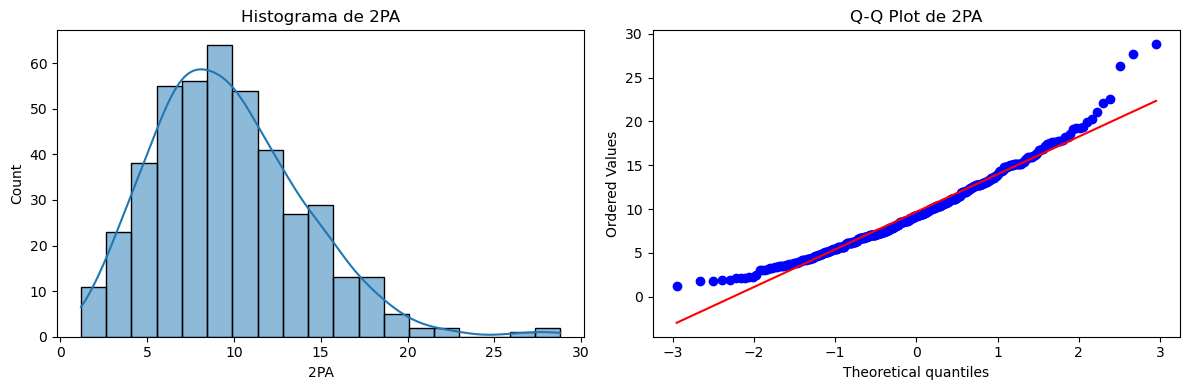

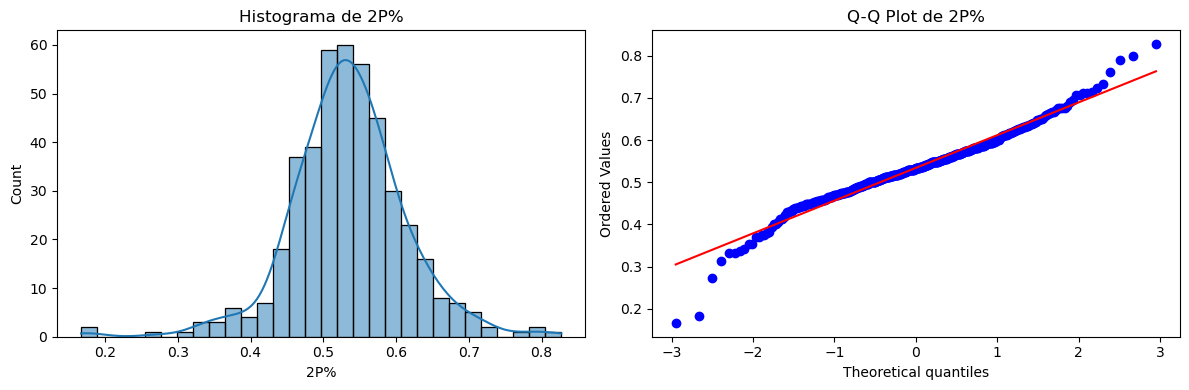

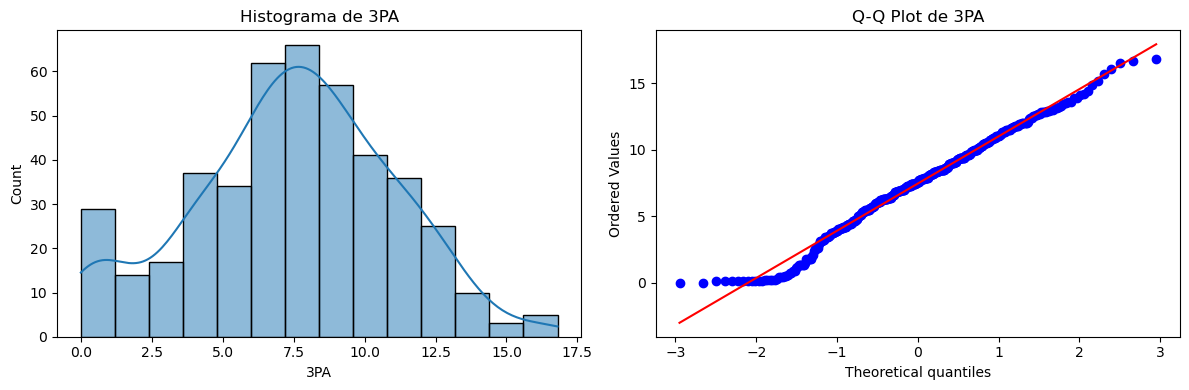

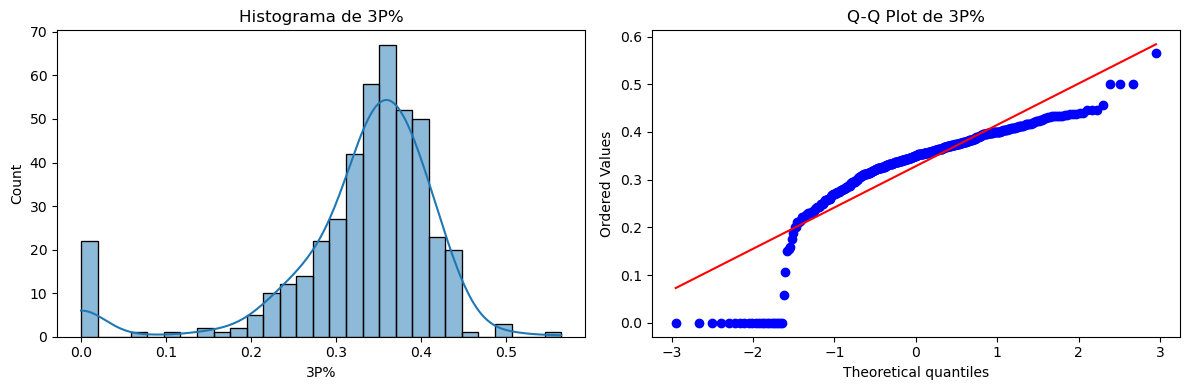

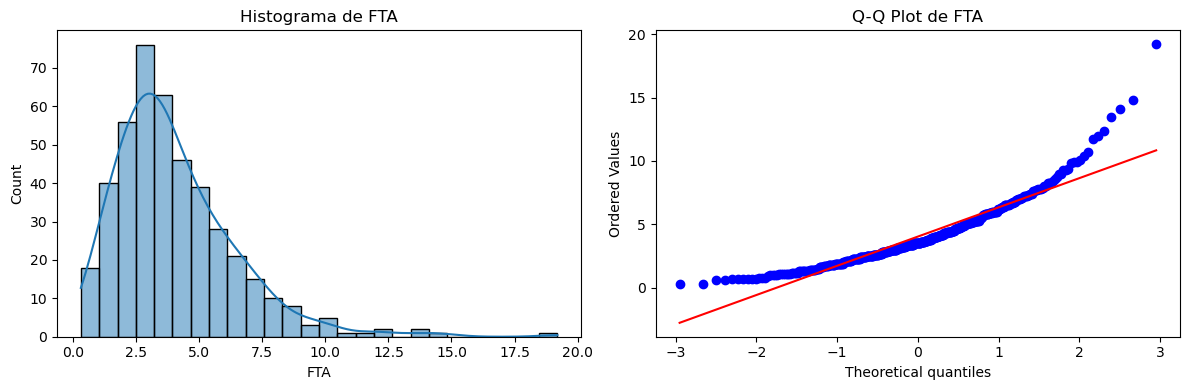

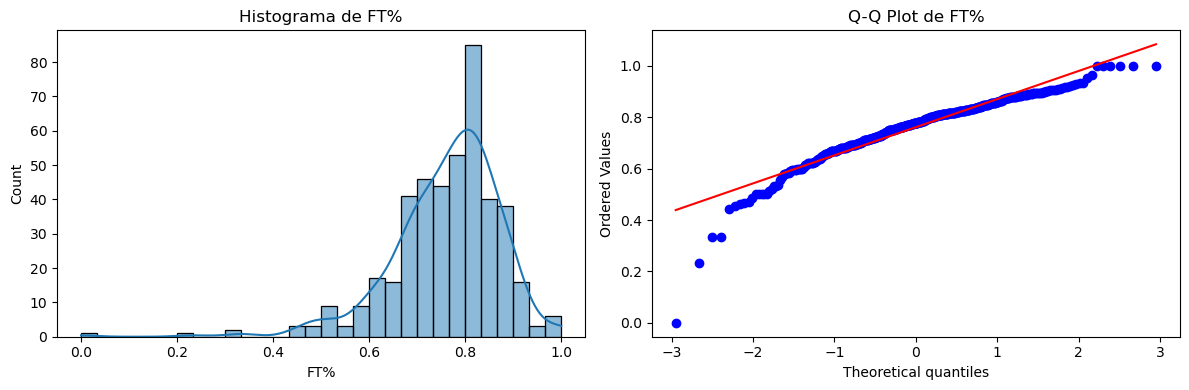

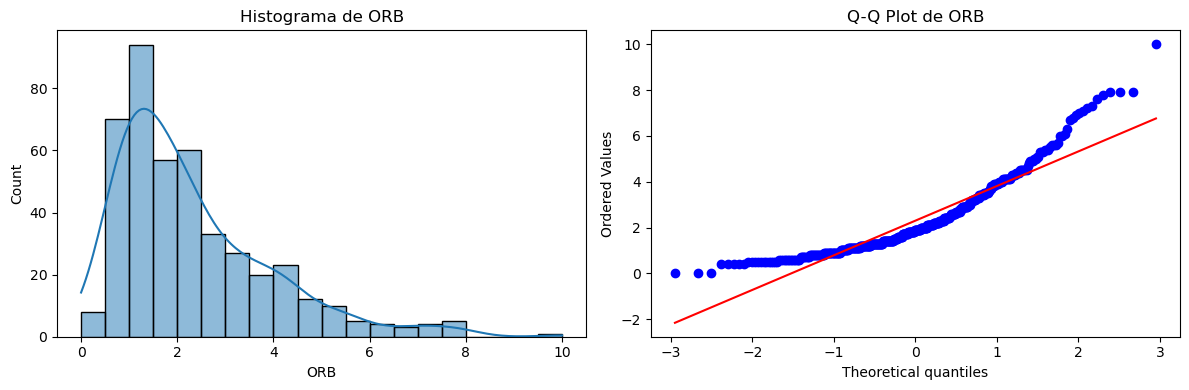

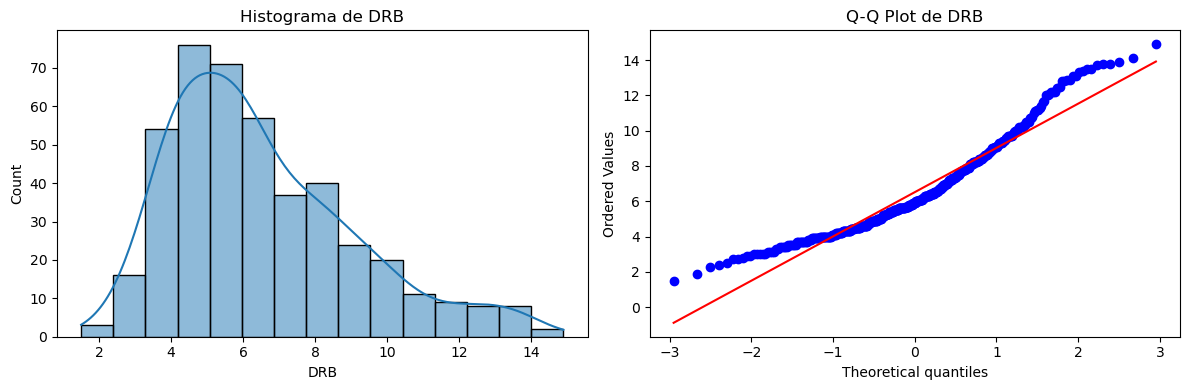

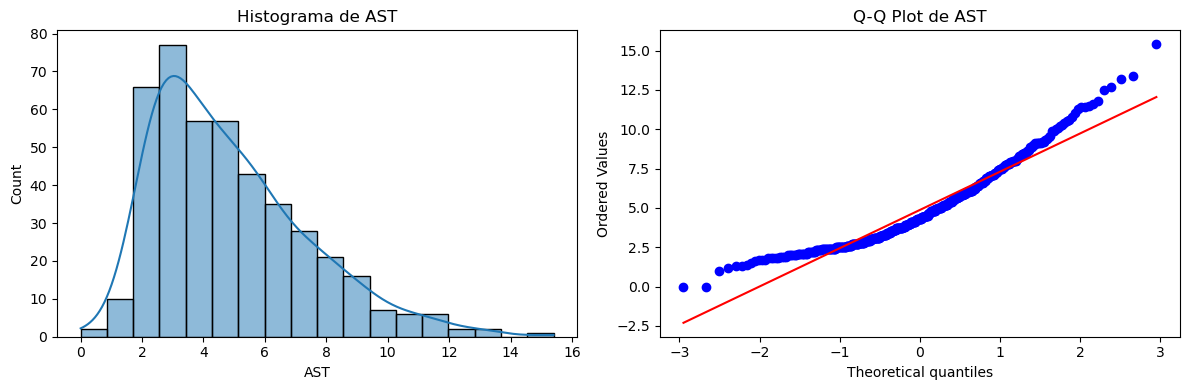

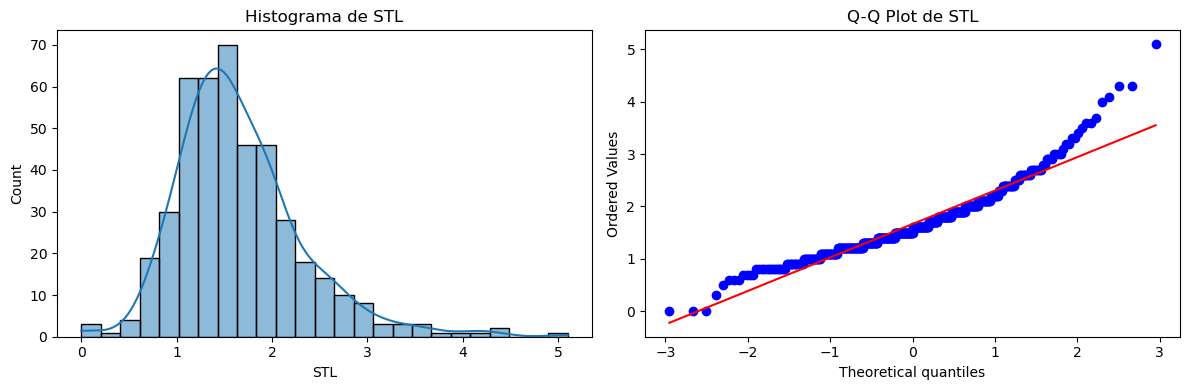

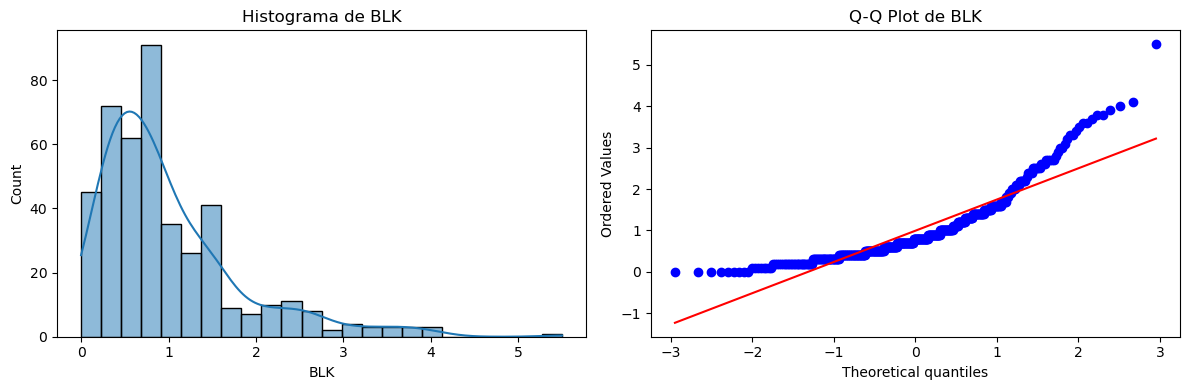

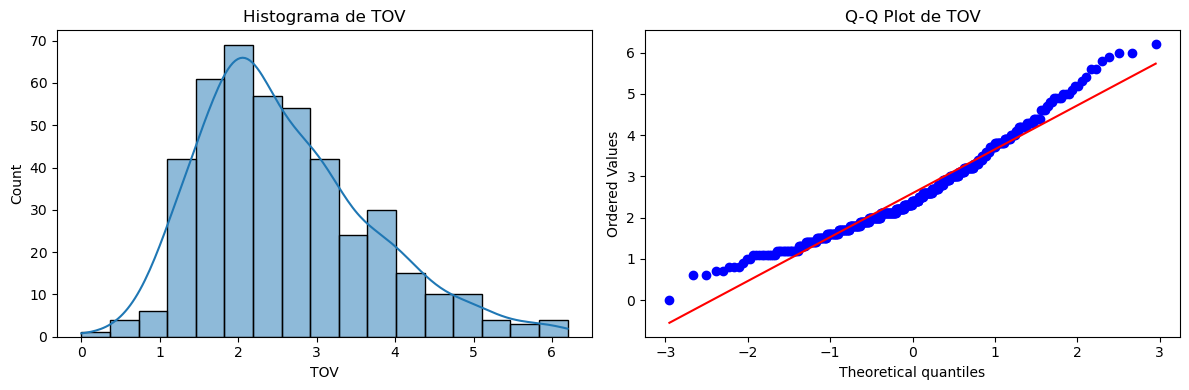

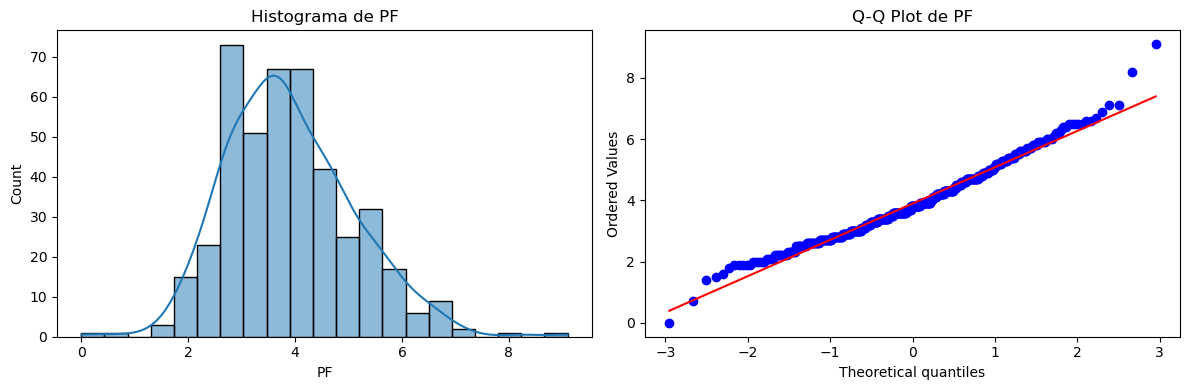

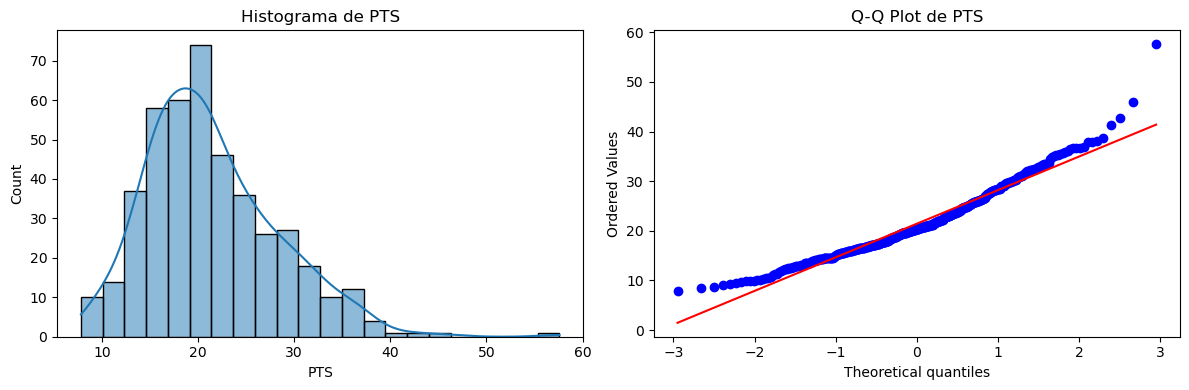

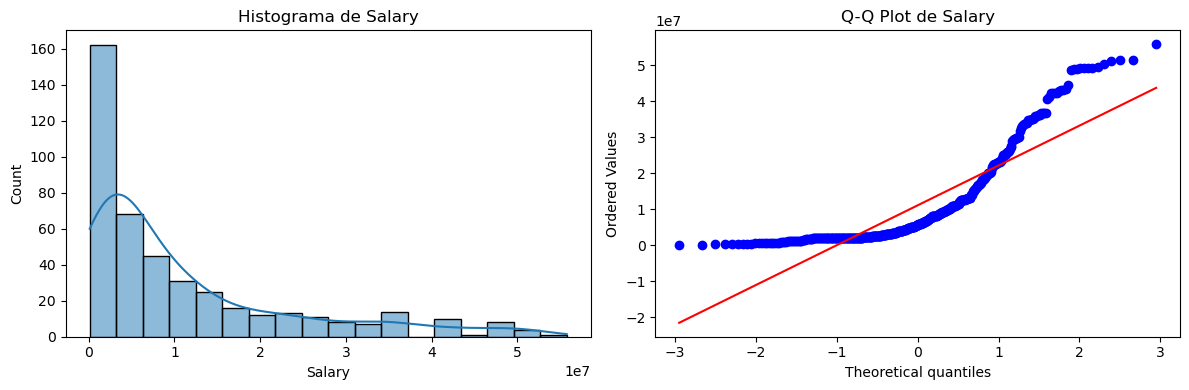

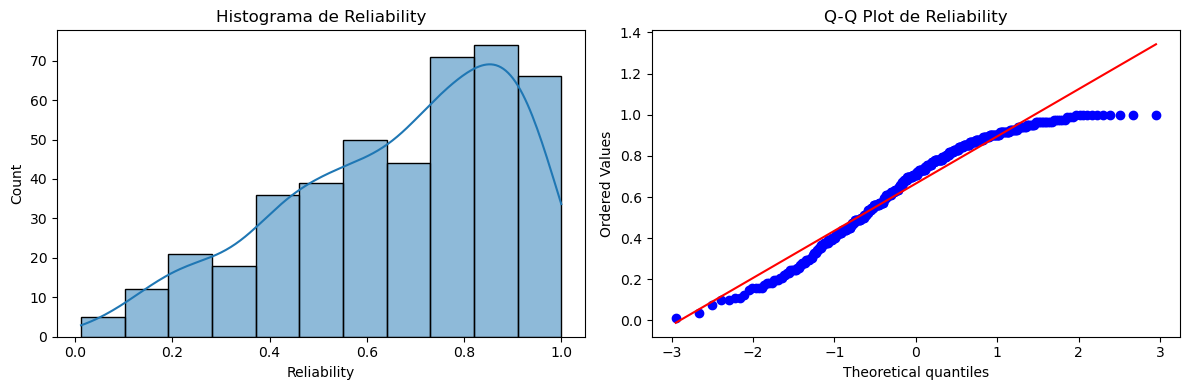

In [86]:
import scipy.stats as stats

for var in M_Final_DB_Num:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(M_Final_DB_Num[var].dropna(), kde=True)
    plt.title(f"Histograma de {var}")
    
    plt.subplot(1, 2, 2)
    stats.probplot(M_Final_DB_Num[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot de {var}")
    
    plt.tight_layout()
    plt.show()


Podemos ver que la mitad de los datos son normales y los que no lo son como pueden ver tienen problemas en las colas pues en vez de estar centrados se cargan a la derecha o a la izquierda. Esto sera un problema de normalidad con el que intentaremos vivir.

In [87]:
Descripción = M_Final_DB_Num.describe()
print(Descripción)

               WS        USG%         BPM        VORP         PER         Age  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean     2.700000   19.120183   -0.689450    0.669266   14.098624   26.110092   
std      2.558214    5.601199    2.978178    1.295978    4.421676    4.418018   
min     -1.200000    7.600000  -13.600000   -1.600000    0.000000   19.000000   
25%      0.775000   15.075000   -2.500000   -0.100000   10.975000   23.000000   
50%      2.000000   17.850000   -0.800000    0.300000   13.600000   25.000000   
75%      4.000000   22.550000    0.900000    1.125000   16.600000   29.000000   
max     16.700000   42.200000   13.300000    9.800000   32.000000   40.000000   

             2PA         2P%         3PA         3P%  ...         ORB  \
count  436.00000  436.000000  436.000000  436.000000  ...  436.000000   
mean     9.68922    0.534108    7.453899    0.328339  ...    2.302064   
std      4.34581    0.078630    3.554095    0.09667

Podemos ver que las medias y varianzas de los datos en la base. Puede que algunas metricas se vean raras esto se debe a que el set de datos esta ajustado a 48 minutos es decir se extrapola la producción total que tendria el jugador si jugara todo el partido. Esto se hizo con el fin de tener un set de datos más "normal" para jugadores que no forman parte de la rotación de su equipo consistentemente.

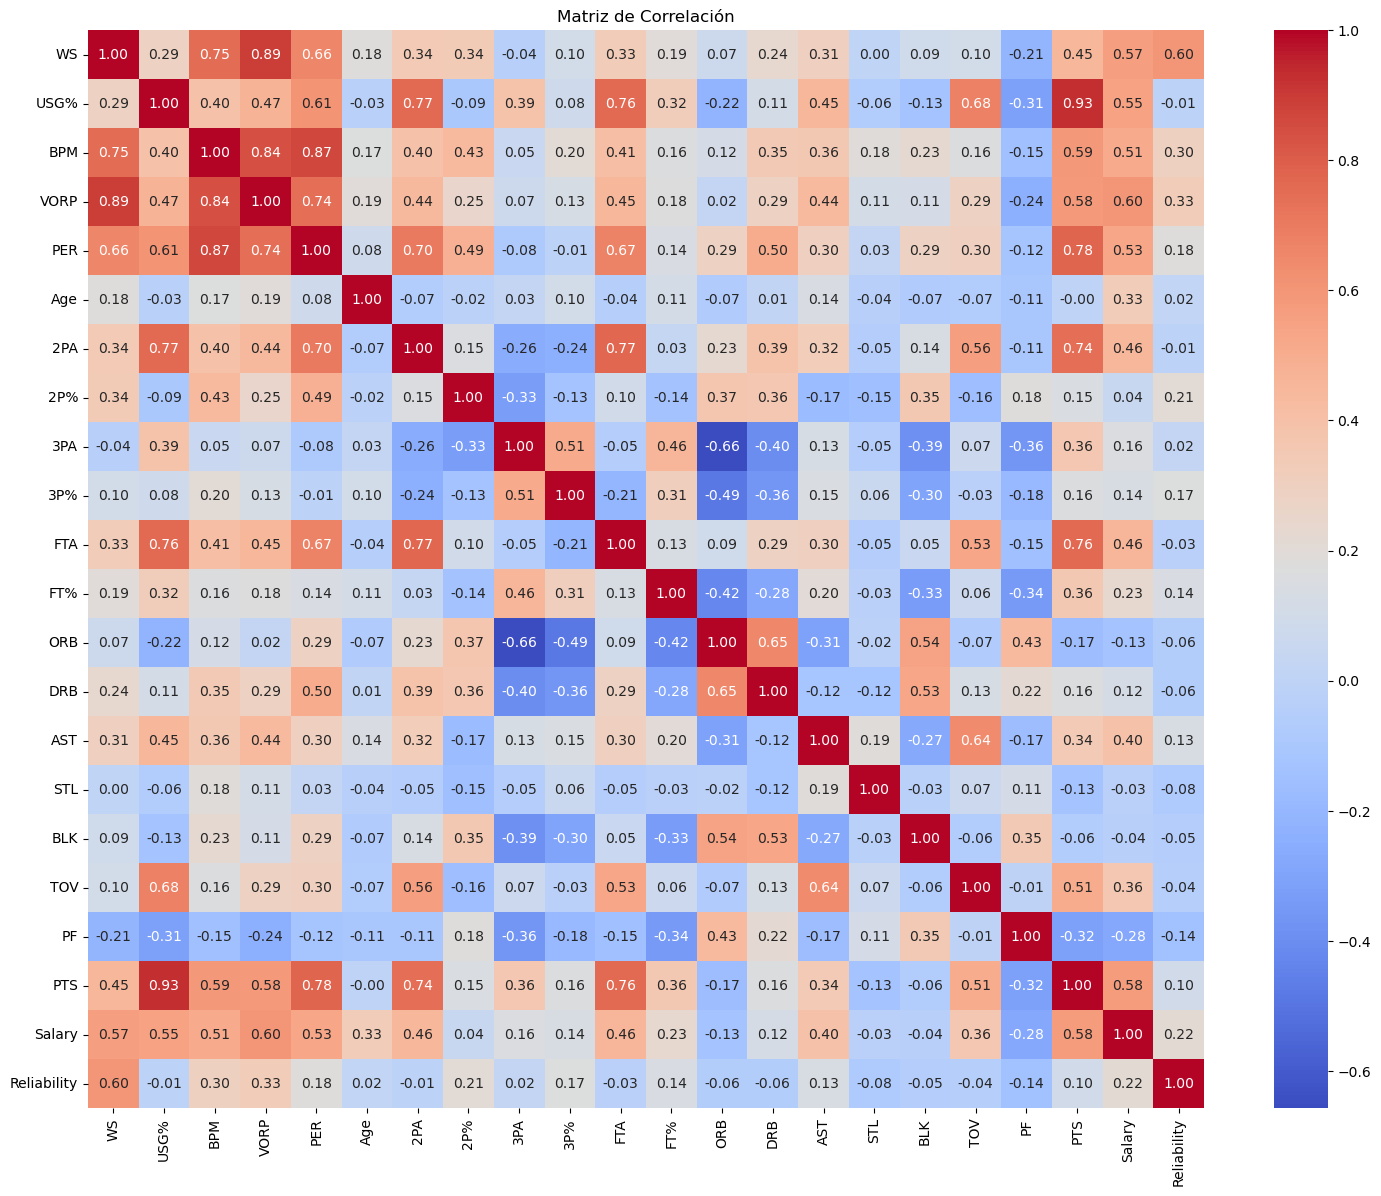

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))  # Ajusta el tamaño según lo que necesites
corr = M_Final_DB_Num.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Lo que podemos ver en estas correlaciones son resultados esperados. Como que los jugadores que más puntos generan son lo que tienen myor usage y a su vez mayoes intentos de tiro. 

Otras correlaciones interesantes son la parte superior izquierda que muestra que las win shares estan fuertemente correlacionadas con otras metricas avanzadas de desempeño.

Por último una correlacion negativa que me gustria destacar son los Rebotes Ofensivos y los intentos de triple, esto sugiere que aquellos jugadore que no suelen intentar triple suelen grabitas más cerca de la canasta a la ofensiva lo que por ende los lleva a pelear más rebotes.

### Parte 3: Selección de características

La idea de este apartado es utilizar nuestros datos para nuevamente hacer una anlisis en este caso me gustaria usar la tecnica de componentes principales para agrupar las caracteristicas que pueden tener los jugadores.

In [89]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler

X = M_Final_DB.drop(['WS','Player','G',"Salary"],axis = 1)
X_num = X.select_dtypes(include='number')
y = M_Final_DB["WS"]

X_scaled = StandardScaler().fit_transform(X_num)

selector = SelectKBest(score_func=mutual_info_regression, k=10)

X_selected = selector.fit_transform(X_scaled, y)

selected_features = X_num.columns[selector.get_support()]
print("Características seleccionadas por SelectKBest:")
print(selected_features)

Características seleccionadas por SelectKBest:
Index(['BPM', 'VORP', 'PER', 'Age', '2P%', '3P%', 'FTA', 'FT%', 'PTS',
       'Reliability'],
      dtype='object')


Dado que nuestros datos eran no parametricos tuvimos que usar **mutual_info_regression** lo que me parece interesante de esta prueba es que las variables relacionadas con las WS no incluye ninguna variable defensiva aun y cuando el calculo de este si lo hace, lo que me suena interesante y podria ser razón para descartar el modelo.

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

eigenvalores = pca.explained_variance_
varianza_explicada = pca.explained_variance_ratio_
tabla_pca = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(eigenvalores))],
    "Eigenvalor": np.round(eigenvalores, 3),
    "Varianza Explicada (%)": np.round(varianza_explicada * 100, 2),
    "Varianza Acumulada (%)": np.round(np.cumsum(varianza_explicada) * 100, 2)
})

print(tabla_pca)

   Componente  Eigenvalor  Varianza Explicada (%)  Varianza Acumulada (%)
0         PC1       5.844                   29.15                   29.15
1         PC2       4.105                   20.48                   49.63
2         PC3       2.059                   10.27                   59.90
3         PC4       1.427                    7.12                   67.02
4         PC5       1.046                    5.22                   72.24
5         PC6       0.990                    4.94                   77.18
6         PC7       0.832                    4.15                   81.33
7         PC8       0.670                    3.34                   84.67
8         PC9       0.611                    3.05                   87.72
9        PC10       0.496                    2.47                   90.19
10       PC11       0.461                    2.30                   92.49
11       PC12       0.423                    2.11                   94.60
12       PC13       0.323             

In [91]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(X_num.columns))], index=X_num.columns)
print("Cargas de variables por componente:")
print(loadings.round(3))

Cargas de variables por componente:
               PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
USG%         0.356 -0.137  0.232  0.125 -0.073  0.073 -0.058  0.039 -0.025   
BPM          0.312  0.066 -0.377 -0.162 -0.095  0.116  0.053  0.060  0.060   
VORP         0.319  0.014 -0.285 -0.173  0.058 -0.005  0.054  0.213 -0.048   
PER          0.370  0.144 -0.173  0.023 -0.058  0.085  0.072 -0.073  0.060   
Age          0.028 -0.051 -0.221 -0.136  0.765  0.387 -0.159 -0.150 -0.004   
2PA          0.335  0.120  0.251  0.063  0.059 -0.095  0.103 -0.087  0.092   
2P%          0.093  0.267 -0.334  0.169 -0.114 -0.139 -0.076 -0.389  0.462   
3PA          0.046 -0.383 -0.075  0.180 -0.235  0.271 -0.177  0.196 -0.144   
3P%          0.018 -0.291 -0.294 -0.066 -0.265  0.166 -0.369  0.056  0.206   
FTA          0.334  0.051  0.233  0.111  0.032 -0.009  0.147 -0.125  0.032   
FT%          0.111 -0.284 -0.126  0.164 -0.008  0.072  0.168 -0.564 -0.592   
ORB          0.006  0.434  0

Con estas tablas respectivamente podemos concluir en el primer caso que idealemnte usar 4 Componentes seria lo ideal pues ya con esto es suficiente para cubrir el 70% de la variabilidad de los datos. Pero con la finalidad de poder obtener más diferencias en los estilos de juego usaremos 6 componentes.

A su vez podemos usar la segunda tabla los loadings, para interpretar que variables tienen mayor perso en estos componentes y con esto podemos definir estilos de juego:

- En el caso de CP1 tenemos que sus variables con más peso nos denotan que muestra las caracteristicas de jugadores con alto nivel de producción en puntos que demás esta acompañado por alta eficiencia.

- En el caso de CP2 tenemos que sus variables denotan a rebotadores y defensores de la pintura que mal juego exterior especificamente tiro perimetral.

- En CP3 podemos ver jugadores contrarios al caso uno, jugadores muy poco eficientes y consistencia en el juego

- En CP4 podemos ver jugadores que son tiradores de larga distancia que tienen una mala defensa perimetral y pasn poco la bola

- CP5 captura la veterania, juagadores que ya son más grandes y denota las caracteristicas que suelen perder por la edad.

- Por ultimo CP6 captura jugadores con un muy buen aporte defensivo pero que no sulen jugar mucho, probablemnte jugadores que suelen lesionarse frecuentemente.

In [93]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)
pca_scores = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(6)], index=X.index)
BD_C = pd.concat([M_Final_DB[["Player", "WS", "Salary"]], pca_scores], axis=1)
BD_C.to_csv('C:/Users/Mauricio/Documents/Maestría en Ciencia de Datos/Segundo Tetramestre/Aprendizaje Automatico/Final_DB_Modificado.csv')
BD_C.head()

,Player,WS,Salary,PC1,PC2,PC3,PC4,PC5,PC6
0,Shai Gilgeous-Alexander,16.7,35859950.0,10.048059,-0.521790,-2.229934,-1.220155,-0.764030,0.039131
1,Nikola Jokic,16.4,51415938.0,9.946765,1.155837,-3.261358,-3.099969,0.447744,0.164240
3,Jarrett Allen,11.6,20000000.0,2.609953,4.523419,-1.805254,0.538793,1.367928,-1.589292
4,Giannis Antetokounmpo,11.5,48787676.0,10.021521,3.359232,0.004800,-0.291663,1.556804,-0.361756
5,Tyrese Haliburton,10.4,42176000.0,3.755968,-2.108327,-2.704488,-1.805462,-0.286505,-0.910135


Por ultimo solamente transformamos las variables a componentes principales para trabajr con ellas en un futuro

### Parte 4 - Cluestering

En este apartado buscaremos agrupara a los jugadores por sus diferentes caracteristicas e interpretar estas agrupaciones

c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

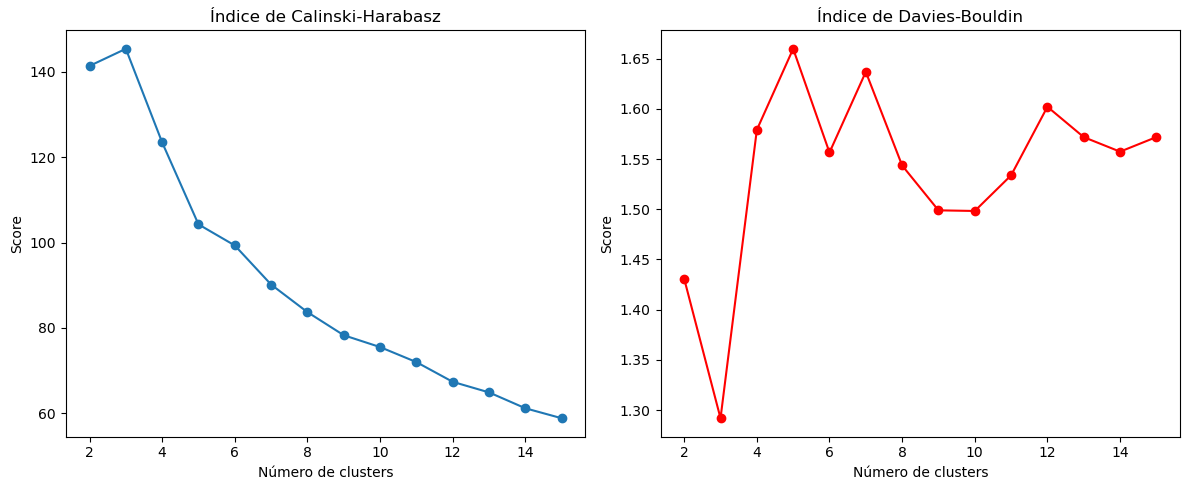

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

ch_scores = []
db_scores = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    ch_scores.append(calinski_harabasz_score(X_pca, labels))
    db_scores.append(davies_bouldin_score(X_pca, labels))

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title("Índice de Calinski-Harabasz")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


<!-- Aplicamos la prueba Calinski-Harabasz y Davies-Bouldin para obtener las k mean ideales para nuestra Clusterisación. En este caso para Calinski-Harabasz buscariamos el número de Clúster que maximice el Índice este podria ser 3. Mientras que para Davies-Bouldin buscamos el valor que sea menor, en este caso seria el valor 3.

Esto nos hace concluir entonces que el número ideal de clúster seria 3, ya que es el punto en el que se cumplen ambas pruebas y resulta que coincide en ambas. -->

Calinski-Harabas mide la dispersión de los clusters y podemos interpretarlo como que a mayor valor, mayor dispersion entre los clusters. Mientras que Davies-Bouldin mide la dispersión interna del cluster lo que nos hace buscar un valor bajo pues este representa una mejo compacidad.

Basado en las graficas el mejor punto para ambas es el número 3 donde de maximiiza CH y de miniimiza DB.

In [99]:
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
labels_final = kmeans_final.fit_predict(X_pca)
BD_C["Cluster"] = labels_final
BD_C.head()


c:\Users\Mauricio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Player,WS,Salary,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,Shai Gilgeous-Alexander,16.7,35859950.0,10.048059,-0.521790,-2.229934,-1.220155,-0.764030,0.039131,2
1,Nikola Jokic,16.4,51415938.0,9.946765,1.155837,-3.261358,-3.099969,0.447744,0.164240,2
3,Jarrett Allen,11.6,20000000.0,2.609953,4.523419,-1.805254,0.538793,1.367928,-1.589292,0
4,Giannis Antetokounmpo,11.5,48787676.0,10.021521,3.359232,0.004800,-0.291663,1.556804,-0.361756,2
5,Tyrese Haliburton,10.4,42176000.0,3.755968,-2.108327,-2.704488,-1.805462,-0.286505,-0.910135,2


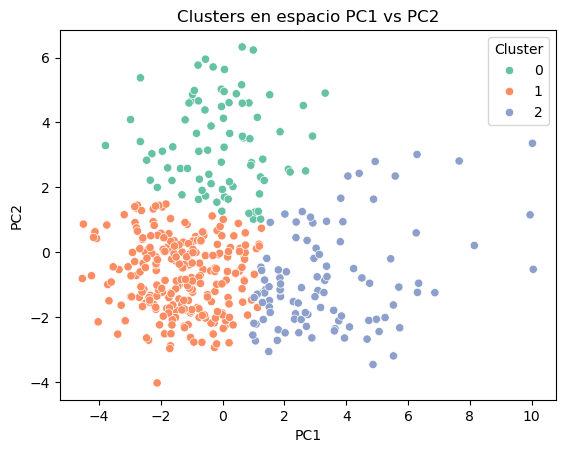

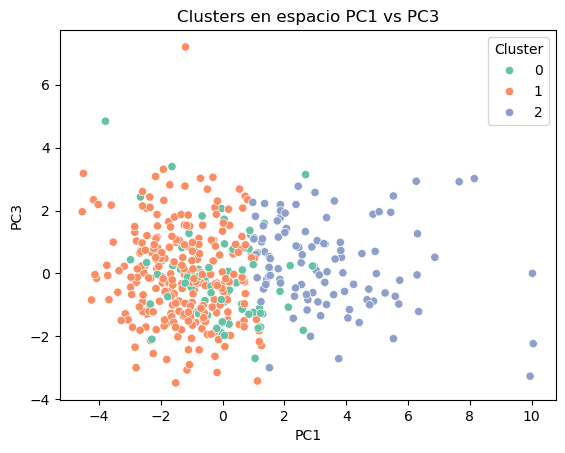

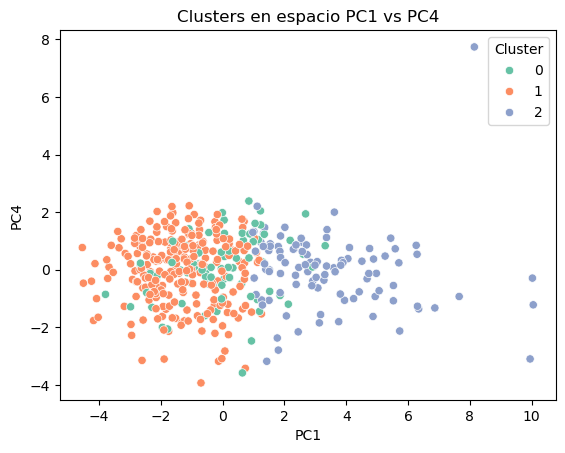

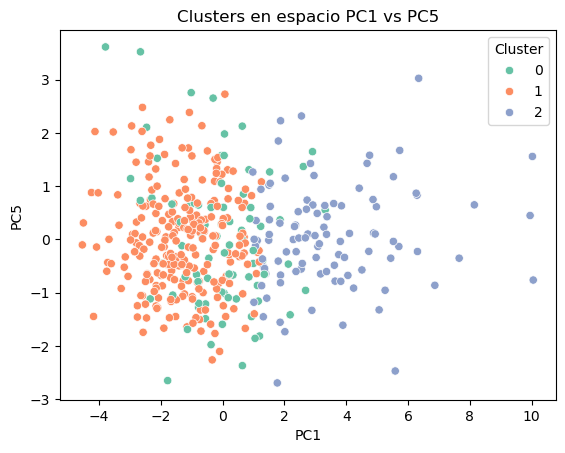

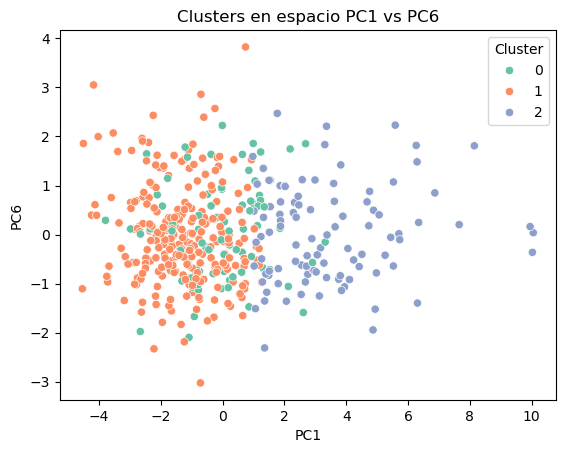

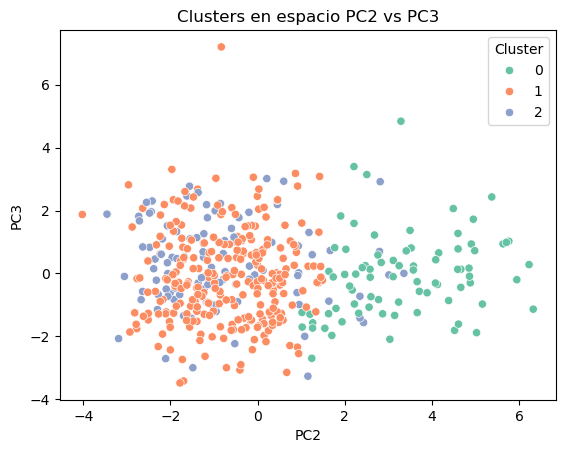

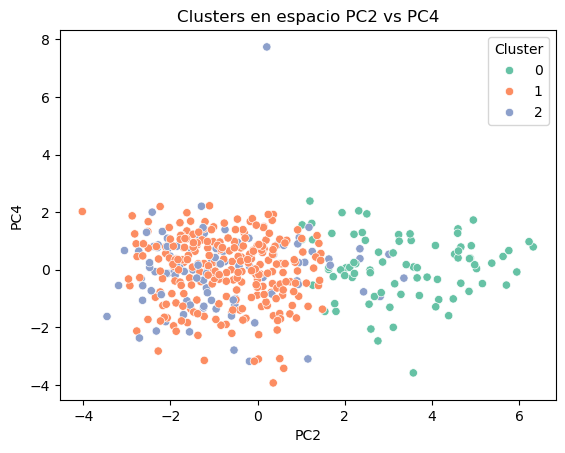

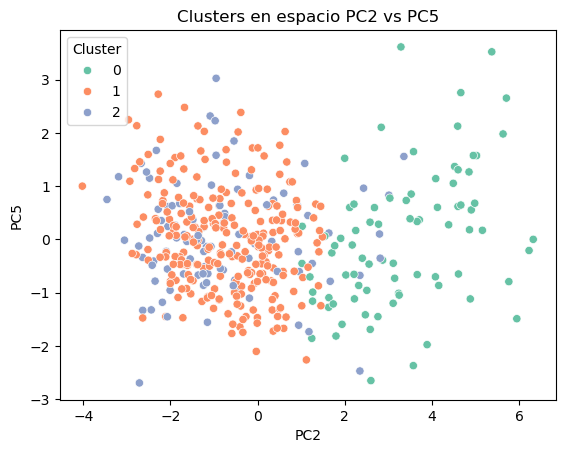

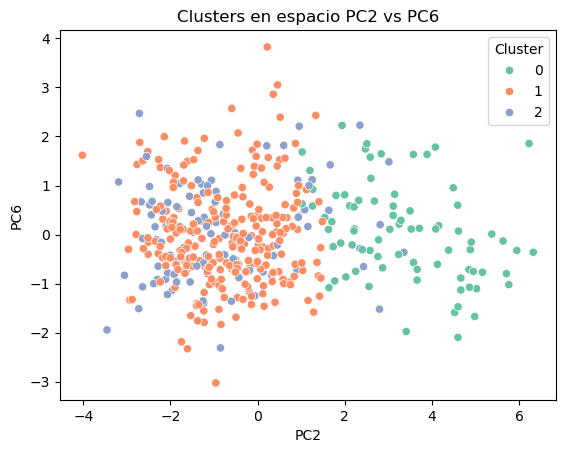

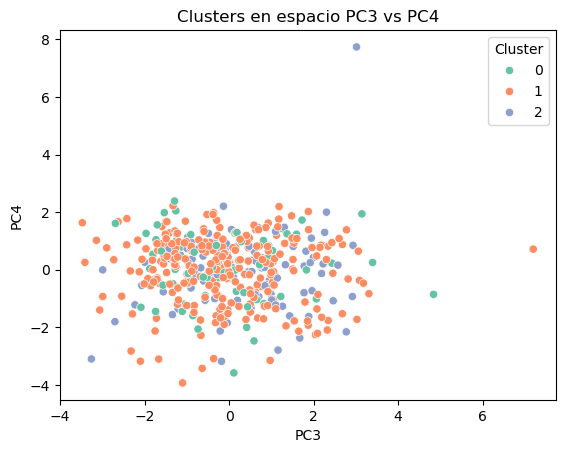

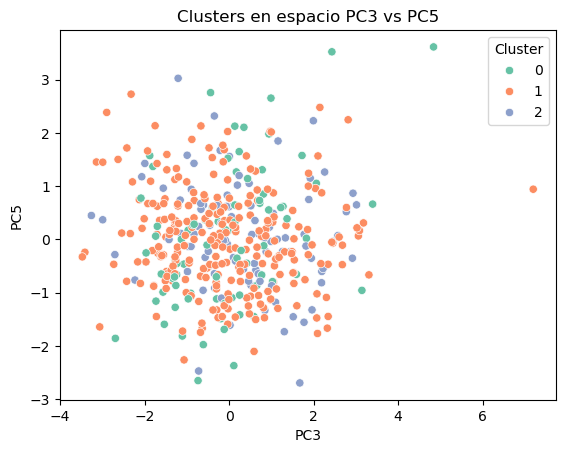

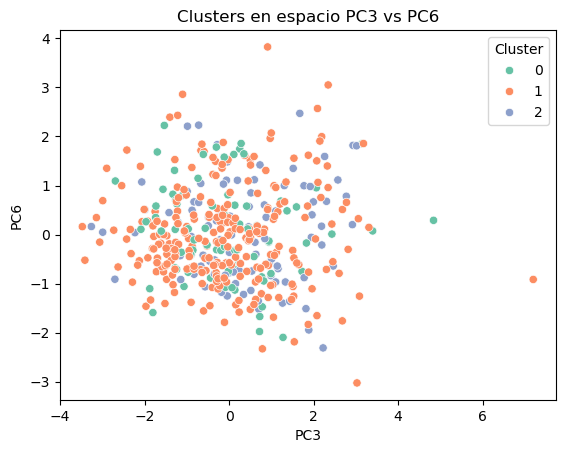

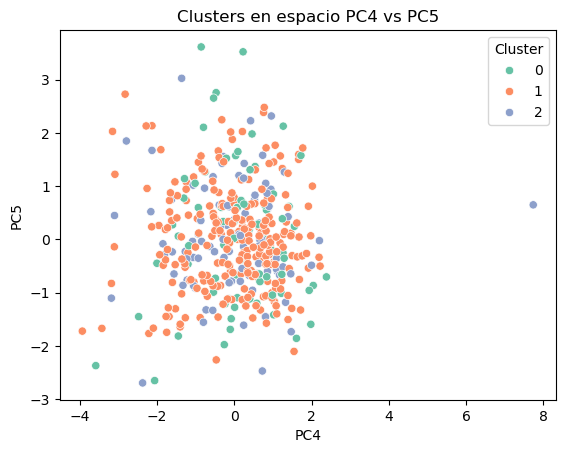

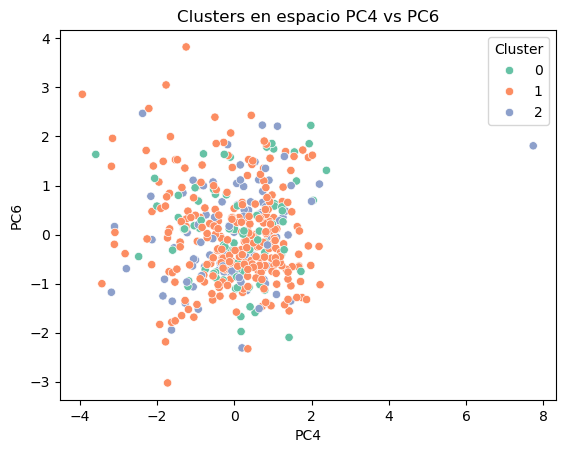

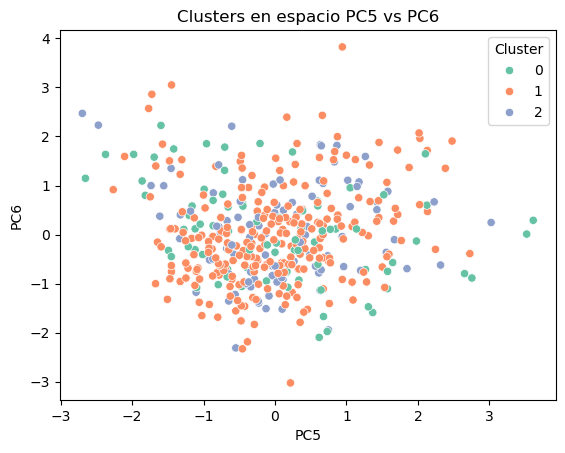

In [101]:
import seaborn as sns
Comaprativa = [['PC1','PC2'],['PC1','PC3'],['PC1','PC4'],['PC1','PC5'],['PC1','PC6'],['PC2','PC3'],['PC2','PC4'],['PC2','PC5'],['PC2','PC6'],
['PC3','PC4'],['PC3','PC5'],['PC3','PC6'],['PC4','PC5'],['PC4','PC6'],['PC5','PC6']]

for i in Comaprativa:
    sns.scatterplot(data=BD_C, x = i[0], y = i[1], hue="Cluster", palette="Set2")
    plt.title(f"Clusters en espacio {i[0]} vs {i[1]}")
    plt.show()
